In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
def check_df(dataframe, head=5):
    print("###Shape###")
    print(dataframe.shape)
    print("###Types###")
    print(dataframe.dtypes)
    print("###Head###")
    print(dataframe.head(head))
    print("###Tail###")
    print(dataframe.tail(head))
    print("###NA###")
    print(dataframe.isnull().sum())
    print("###Quantiles###")
    print(dataframe.describe([0,0.05,0.50,0.95,0.99,1]).T)

In [9]:
check_df(df)

###Shape###
(891, 15)
###Types###
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
###Head###
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       Fal

In [10]:
df2 = sns.load_dataset("tips")
check_df(df2)

###Shape###
(244, 7)
###Types###
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
###Head###
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
###Tail###
     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2
###NA###
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0

In [12]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]

In [13]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [16]:
num_but_cat = [col for col in df.columns if (df[col].dtypes in ["int","float"]) and (df[col].nunique() < 10)]

In [17]:
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [18]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category","object"]]

In [19]:
cat_but_car

[]

In [20]:
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [21]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [26]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#########################")

In [24]:
cat_summary(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302


In [27]:
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
#########################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################
     alive      Ratio
no     549  61.616162
yes    342  38.383838
#########################
     

In [28]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("#########################")
    if plot:
        sns.countplot(x=dataframe[col_name], data = dataframe)
        plt.show(block=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################


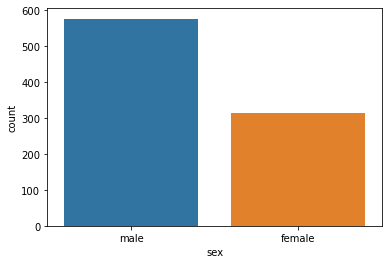

In [29]:
cat_summary(df, "sex", plot=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################


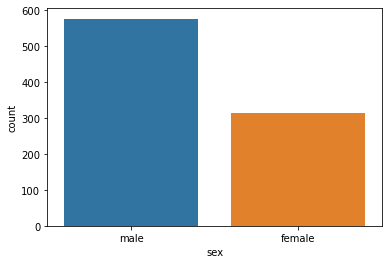

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################


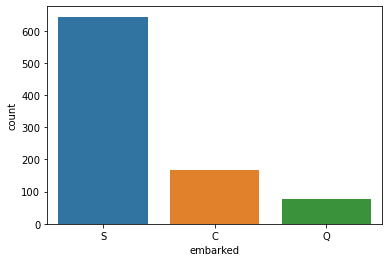

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################


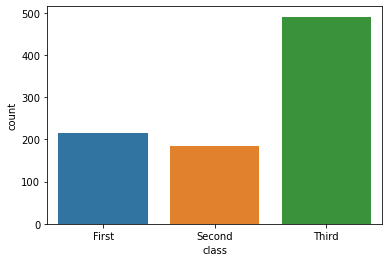

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################


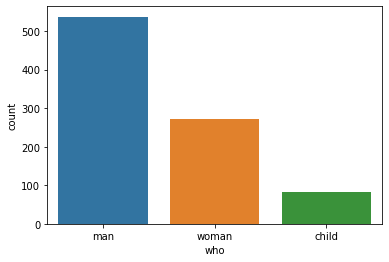

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################


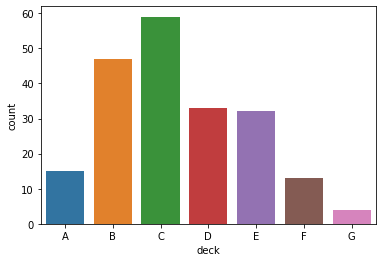

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################


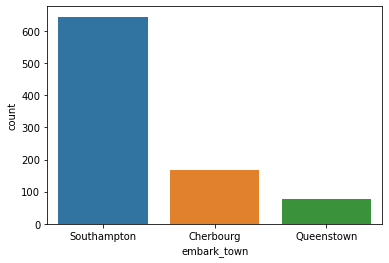

     alive      Ratio
no     549  61.616162
yes    342  38.383838
#########################


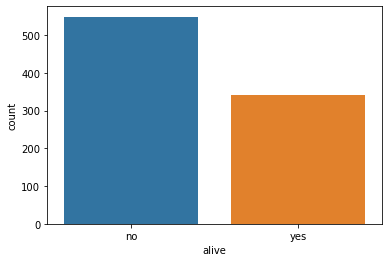

   survived      Ratio
0       549  61.616162
1       342  38.383838
#########################


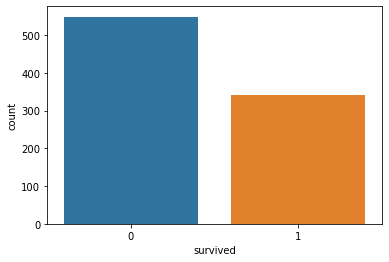

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#########################


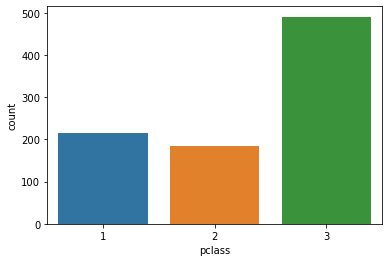

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#########################


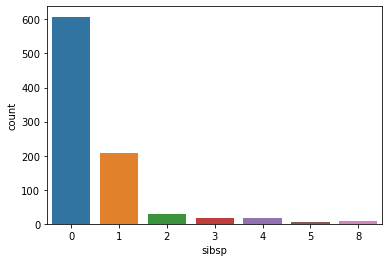

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#########################


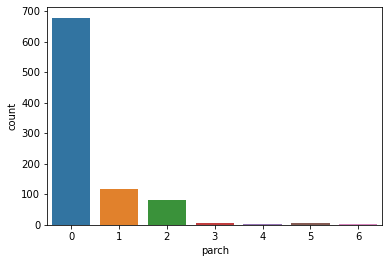

In [31]:
for col in cat_cols:
    if df[col].dtypes != "bool":
        cat_summary(df, col, plot=True)

In [33]:
df["adult_male"].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int64

        sex      Ratio
male    577  64.758698
female  314  35.241302
#########################


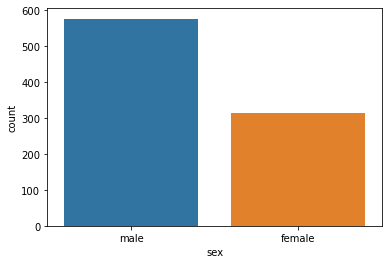

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#########################


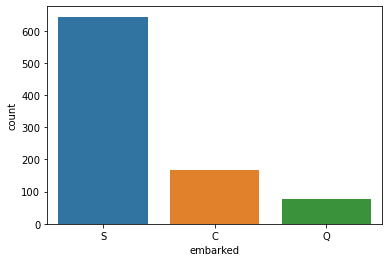

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#########################


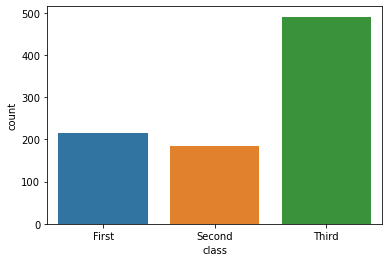

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#########################


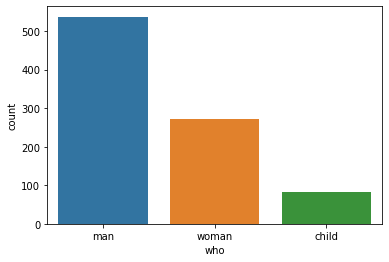

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
#########################


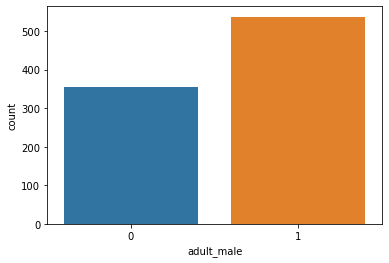

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#########################


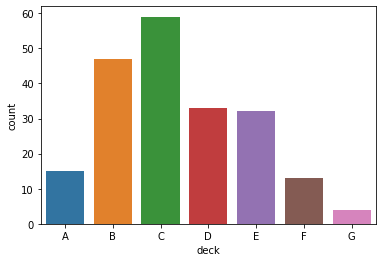

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#########################


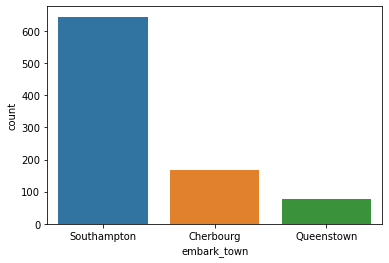

     alive      Ratio
no     549  61.616162
yes    342  38.383838
#########################


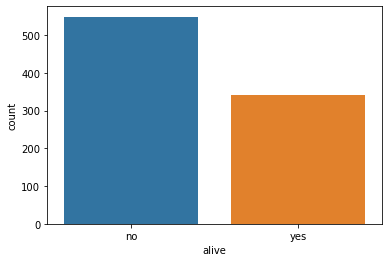

   alone     Ratio
1    537  60.26936
0    354  39.73064
#########################


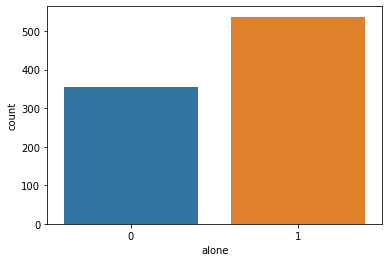

   survived      Ratio
0       549  61.616162
1       342  38.383838
#########################


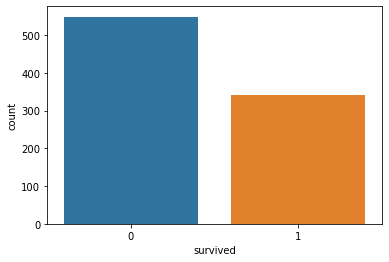

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#########################


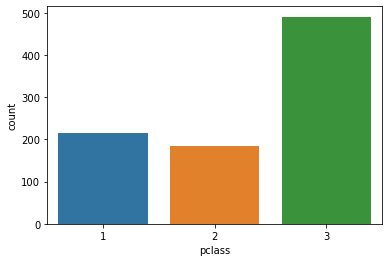

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#########################


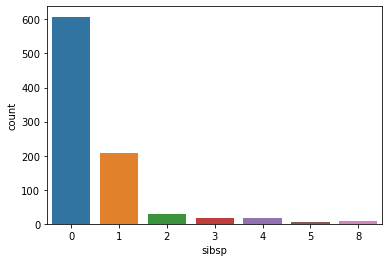

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#########################


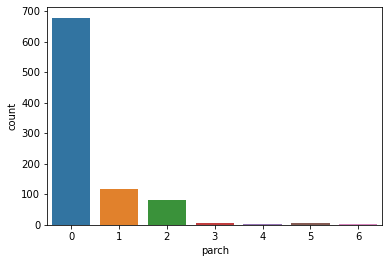

In [36]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
    cat_summary(df, col, True)